In [ ]:
import sys
sys.path.append("./drive_interfaces/carla/carla_client/")
from carla.client import make_carla_client
from carla.settings import CarlaSettings
from carla.client import VehicleControl

In [ ]:
with open("./drive_interfaces/carla/yang_template.ini", "r") as f:
    print(f.read())

In [ ]:
import random
from carla.sensor import Camera, Lidar
settings = CarlaSettings()
settings.set(
    SynchronousMode=True,
    SendNonPlayerAgentsInfo=True,
    NumberOfVehicles=20,
    NumberOfPedestrians=40,
    WeatherId=random.choice([1, 3, 7, 8, 14]),
    QualityLevel="Low")
settings.randomize_seeds()

# Now we want to add a couple of cameras to the player vehicle.
# We will collect the images produced by these cameras every
# frame.

# The default camera captures RGB images of the scene.
camera0 = Camera('CameraRGB')
# Set image resolution in pixels.
camera0.set_image_size(800, 600)
# Set its position relative to the car in meters.
camera0.set_position(0.30, 0, 1.30)
settings.add_sensor(camera0)

# Let's add another camera producing ground-truth depth.
camera1 = Camera('CameraDepth', PostProcessing='Depth')
camera1.set_image_size(800, 600)
camera1.set_position(0.30, 0, 1.30)
settings.add_sensor(camera1)

print(str(settings))

In [ ]:
from carla.client import CarlaClient
client = CarlaClient("127.0.0.1", 2000)
client.connect()
with open("./drive_interfaces/carla/yang_template.ini", "r") as f:
    #client.load_settings(settings)
    client.load_settings(f.read())
client.start_episode(0)
measurements, sensor_data = client.read_data()
client.send_control(VehicleControl())

client.disconnect()

In [ ]:
with make_carla_client("127.0.0.1", 2000) as client:
    with open("./drive_interfaces/carla/yang_template.ini", "r") as f:
        #client.load_settings(settings)
        client.load_settings(f.read())
    client.start_episode(0)
    measurements, sensor_data = client.read_data()
    client.send_control(VehicleControl())

In [ ]:
measurements.player_measurements

In [ ]:
sensor_data.keys()

In [ ]:
image_converter.depth_to_array(sensor_data['DepthLeft']).shape

In [ ]:
a=image_converter.labels_to_array(sensor_data['SegLeft'])

In [ ]:
import numpy as np
b=a[:,:,np.newaxis]

In [ ]:
b.shape

In [ ]:
import scipy.misc
image = scipy.misc.imresize(b, [30, 40], interp='nearest')

In [ ]:
a=sensor_data['DepthLeft']

In [ ]:
from carla import image_converter

In [ ]:
b=image_converter.depth_to_array(a)
b.shape

In [ ]:
b

In [ ]:
measurements

In [ ]:
measure, sensor =

In [ ]:
path= "/scratch/yang/aws_data/carla_collect/1/2018726_default_RotationPitch=-15_WeatherId=10_4/data_00000.h5"
import h5py
f=h5py.File(path, "r")

In [ ]:
f.keys()

In [ ]:
import cv2
image = cv2.imdecode(f['CameraLeft'][0], 1)

In [ ]:
from PIL import Image
a=Image.fromarray(image)

In [ ]:
a

In [ ]:
path= "/scratch/yang/aws_data/carla_collect/1/2018726_default_RotationPitch=-15_WeatherId=10_5/data_00000.h5"
path = "/data/yang/code/aws/scratch/carla_collect/1/2018727_default_RotationPitch=0_WeatherId=13_1/data_00000.h5"
path = "/scratch/yang/aws_data/carla_collect/1/2018730_default_RotationPitch=0_WeatherId=01_1/data_00000.h5"
def sample_images_from_h5(path):
    f=h5py.File(path, "r")
    for key in f.keys():
        if 'targets' not in key:
            for imid in range(200):
                data = f[key][imid]
                if 'camera' in key.lower():
                    ext = ".jpg"
                else:
                    ext = ".png"
                out_name = path+"." + key + str(imid).zfill(4) + ext
                with open(out_name, "w") as g:
                    g.write(data)
sample_images_from_h5(path)

"ffmpeg -i data_00000.h5.CameraMiddle%04d.png -c:v libx264 out.mp4"

In [ ]:
from subprocess import call
for i in range(1):
    prefix = "/scratch/yang/aws_data/carla_collect/1/2018730_default_RotationPitch=0_WeatherId="+str(i).zfill(2)+"_1/"
    path = prefix + "data_00000.h5"
    ! ls -alh $path
    sample_images_from_h5(path)
    
    call("ffmpeg -i "+ prefix +"data_00000.h5.CameraMiddle%04d.jpg -c:v libx264 "+ prefix[:-1]+".mp4", shell=True)

In [ ]:
import threading
from multiprocessing import Process
import time

class ControlInterface(object):
    def __init__(self):
        self._throttle = 1.0       
        self.counter = 0        
        self.start_loop()
        self.last_time = time.time()

    def set_throttle(self, new_throttle):
        self._throttle = new_throttle

    def start_loop(self):
        self.counter += 1
        if self.counter % 75 == 0:
            print("time eplapsed is ", time.time()-self.last_time)
            self.last_time = time.time()
            print( "throttle", self._throttle)
        threading.Timer(1.0/75, self.start_loop).start()
        

ctrl = ControlInterface()
print("after constructor")
ctrl.set_throttle(-1.0)

In [ ]:
import os
def get_files_count_in_folder(folder):
    if not os.path.exists(folder):
        return 0
    else:
        pass
import glob
len(glob.glob("/data/yang/code/aws/scratch/carla_collect/1/2018731_default_RotationPitch=0_WeatherId=01_1/*.h5"))

In [ ]:
import os, threading
cmd = ['bash', '-c', " '/scratch/yang/aws_data/carla_0.8.4/CarlaUE4.sh  -carla-server -carla-settings=/data/yang/code/aws/CIL_modular/drive_interfaces/carla/yang_template.ini -benchmark -fps=5' "]
#cmd = cmd.split(" ")
#cmd = [x for x in cmd if x!="" ]
print(" ".join(cmd))
print("before spawnling")
t = threading.Thread(target = lambda : os.system(" ".join(cmd)))
t.start()       
#! ps aux | grep $id0

In [ ]:
len(glob.glob("/data/yang/code/aws/scratch/carla_collect/1/*/data_*.h5"))

In [ ]:
path = "/scratch/yang/aws_data/CIL_modular_data/matthias_data/RC025Val/data_00000.h5"
import h5py

In [ ]:
f=h5py.File(path, "r")

a=f['rgb']

In [ ]:
from PIL import Image
i+=3
print(i)
Image.fromarray(a[i, :,:,:])

In [ ]:
path ="/scratch/yang/aws_data/carla_collect/1/default_ImageSizeX=700_WeatherId=10/data_00099.h5"
import h5py, time
f = h5py.File(path, "r")

In [ ]:
import cv2
start = time.time()
t_decode = 0.0
t_resize = 0.0
for i in range(200):
    a= f["CameraMiddle"][i]
    start = time.time()
    decoded = cv2.imdecode(a, 1)                    
    t_decode += time.time()-start
    sz = (88,200)
    start = time.time()
    decoded = cv2.resize(decoded, (sz[1], sz[0]))
    t_resize += time.time() -start
delta = time.time()-start
print(delta, 200/delta)
print(t_decode, t_resize)

In [ ]:
91*20*200 /1000/1000.0

In [ ]:
8*75/1.5

In [ ]:
from joblib import Parallel, delayed
p = Parallel(n_jobs=8, backend="threading", verbose=10)


func = lambda x : cv2.imdecode(x, 1)
if True:
    height, width = 88, 200
    func_previous = func
    func = lambda x : cv2.resize(func_previous(x), (width, height))
                
func = lambda x : cv2.resize(cv2.imdecode(x, 1), (200, 88))        
func = delayed(func)
results = p(func(f["CameraMiddle"][0]) for i in range(8*75))

In [ ]:
results = p(delayed(cv2.imdecode)(f["CameraMiddle"][i], 1) for i in range(200))

In [ ]:
from PIL import Image
Image.fromarray(results[0])

In [ ]:
import numpy as np
a = np.concatenate((results[0], results[0]+5), axis=2)

In [ ]:
b=cv2.resize(a, (200, 300))


In [ ]:
b.shape

In [ ]:
Image.fromarray(b[:,:,:3])

In [ ]:

def _resize_BHWC(input, sz):
    B, H, W, C = input.shape
    input = np.transpose(input, (1, 2, 3, 0))
    # now input has size H W C B
    input = np.reshape(input, (H, W, C*B))
    print(input.shape)
    output = cv2.resize(input[:,:,:1000], (sz[1], sz[0]))
    output = np.reshape(output, (sz[0], sz[1], C, B))
    output = np.transpose(output, (3, 0, 1, 2))
    return output


In [ ]:
stk = np.stack(results, axis = 0)

In [ ]:
stk.shape

In [ ]:
out = _resize_BHWC(stk, (200, 300))

In [ ]:
func = lambda x: cv2.imdecode(x, 1)
if hasattr(self._config, "hack_resize_image"):
    height, width = self._config.hack_resize_image
    func_previous = func
    func = lambda x: cv2.resize(func_previous(x), (width, height))


# measure the segmentation difference

In [ ]:
path = "/scratch/yang/aws_data/carla_collect/10/default_PositionZ=1.4_WeatherId=03/data_00000.h5"
import h5py
f = h5py.File(path, "r")


In [ ]:
import cv2
for i in range(200):
    image = f['CameraMiddle'][i]
    image = cv2.imdecode(image, 1)
    image = image[:,:, ::-1]
    seg = f['SegMiddle'][i]
    seg = cv2.imdecode(seg, 0)
    break

In [ ]:
seg.shape

0	None
1	Buildings
2	Fences
3	Other
4	Pedestrians
5	Poles
6	RoadLines
7	Roads
8	Sidewalks
9	Vegetation
10	Vehicles
11	Walls
12	TrafficSigns

In [ ]:
# 0          1            2           3               4               5      6
{'Ignored', 'Movable', 'Navigable', 'NoneNavigable', 'StaticLayout', 'Sky', 'Lane'}

In [ ]:
from PIL import Image
Image.fromarray(image)

In [ ]:
import numpy as np
mapping = np.array([0, 4, 3, 0, 1, 4, 6, 2, 3, 4, 1, 4, 4])
seg_cvt = mapping[seg]

In [ ]:
import sys
sys.path.append("/data/yang/code/aws")
from all_perceptions import Perceptions

In [ ]:
p = Perceptions(det_COCO=False,
                 det_TL=False,
                 det_TS=False,
                 seg=True,
                 depth=False,
                 batch_size=1, # batch_size could also be a dict
                 gpu_assignment=[0],
                 compute_methods={},
                 viz_methods={},
                 num_replicates={},
                 path_config="path_jormungandr")

In [ ]:
image_batch = np.expand_dims(image, 0)
out = p.compute(image_batch)

In [ ]:
out = np.squeeze(out['seg'])

In [ ]:
out = np.argmax(out, axis=2) + 1 # 0 does not exists, since it is the ignore class underhood

In [ ]:
out = cv2.resize(out, (out.shape[1]*4, out.shape[0]*4), interpolation=cv2.INTER_NEAREST)

In [ ]:
out.shape

In [ ]:
#sky is ignored, also the ignore class

In [ ]:
Image.fromarray((out==1).astype(np.uint8)*255)

In [ ]:
Image.fromarray((seg_cvt==1).astype(np.uint8)*255)

In [ ]:
def compute_inter_union(gt, pred, nclasses):
    # return a nclass * 2 matrix: [iclass][inter, union]
    out = np.zeros((nclasses, 2), dtype=np.int64)
    pred = pred[gt!=0] - 1 
    gt = gt[gt!=0] - 1
    for i in range(nclasses):
        out[i, 0] = np.sum(np.logical_and(pred == i, gt == i))
        out[i, 1] = np.sum(np.logical_or (pred == i, gt == i))
    return out

In [ ]:
compute_inter_union(seg_cvt, out, 6)

In [ ]:
import pickle
with open("../seg.pkl", "r") as f:
    res = pickle.load(f)

In [ ]:
res

In [ ]:
perf.focal

In [ ]:
import h5py, cv2, sys, pickle, math, numpy
import numpy as np
sys.path.append("/data/yang/code/aws")
from all_perceptions import Perceptions

debug = None

class DepthPerformance():
    def __init__(self):
        width = 768
        fov = 90.0
        self.focal = width / (2.0 * math.tan(fov * math.pi / 360.0))
        self.baseline = 0.54

        self.p = Perceptions(det_COCO=False,
                             det_TL=False,
                             det_TS=False,
                             seg=False,
                             depth=True,
                             batch_size=1,  # batch_size could also be a dict
                             gpu_assignment=[0],
                             compute_methods={},
                             viz_methods={},
                             num_replicates={},
                             path_config="path_jormungandr")

        self.reset()

    def _compute_errors(self, gt, pred):
        thresh = np.maximum((gt / pred), (pred / gt))
        a1 = (thresh < 1.25).mean()
        a2 = (thresh < 1.25 ** 2).mean()
        a3 = (thresh < 1.25 ** 3).mean()

        rmse = (gt - pred) ** 2
        rmse = np.sqrt(rmse.mean())

        rmse_log = (np.log(gt) - np.log(pred)) ** 2
        rmse_log = np.sqrt(rmse_log.mean())

        abs_rel = np.mean(np.abs(gt - pred) / gt)

        sq_rel = np.mean(((gt - pred) ** 2) / gt)

        return abs_rel, sq_rel, rmse, rmse_log, a1, a2, a3

    def reset(self):
        self.accu = []
        self.count = 0

    def one_pair(self, image, depth):
        image_batch = np.expand_dims(image, 0)
        out = self.p.compute(image_batch)
        out = np.squeeze(out['depth'])
        out = cv2.resize(out, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR)

        out = self.baseline * self.focal / (out + 0.0000001)
        out = out / 800.0 # some magic number that I made up 
        global debug 
        debug = out

        errors = self._compute_errors(depth+1e-5, out+1e-5)
        self.accu.append(errors)
        self.count += 1

    def summarize(self):
        names = ['abs_rel', 'sq_rel', 'rmse', 'rmse_log', 'a1', 'a2', 'a3']
        errors = np.stack(self.accu, axis=0)
        errors = np.mean(errors, 0)
        out = {}
        for i in range(len(names)):
            out[names[i]] = errors[i]
        return out


modality = "depth" # "seg"

perf = {"depth": DepthPerformance, "seg":None}[modality]()
results = {}
#for town in ["Town01", "Town02"]:
for town in ["Town02"]:
    results[town] = {}
    for weather in range(1, 14):
        perf.reset()
        path = "/scratch/yang/aws_data/carla_collect/"+town + "_allsensor/default_RotationPitch=0_WeatherId=" +str(weather).zfill(2) + "/data_00000.h5"
        f = h5py.File(path, "r")
        for i in range(200):
            #print(i)
            image = f['CameraMiddle'][i]
            image = cv2.imdecode(image, 1)
            image = image[:,:, ::-1]

            if modality == "seg":
                seg = f['SegMiddle'][i]
                mode_image = cv2.imdecode(seg, 0)
            elif modality == "depth":
                mode_image = f['DepthMiddle'][i]
                mode_image = cv2.imdecode(mode_image, 1)
                # TODO: convert it
                def to_depth(array):
                    # input is bgr
                    array = array.astype(numpy.float32)
                    # Apply (R + G * 256 + B * 256 * 256) / (256 * 256 * 256 - 1).
                    normalized_depth = numpy.dot(array[:, :, :], [65536.0, 256.0, 1.0])
                    normalized_depth /= 16777215.0 / 1000.0  # (256.0 * 256.0 * 256.0 - 1.0)
                    return normalized_depth
                mode_image = to_depth(mode_image)
            else:
                raise
            
            perf.reset()
            perf.one_pair(image, mode_image)
            print(perf.summarize())
            raise
            break
        f.close()
        print(town, "weather", weather, perf.summarize())
        results[town][weather] = perf.summarize()
        with open(modality + ".pkl", "w") as ppp:
            pickle.dump(results, ppp)



In [ ]:
mode_image.dtype

In [ ]:
(mode_image[:,:,0]==mode_image[:,:,2]).all()

In [ ]:
np.histogram(mode_image)

In [ ]:
def to_gray(normalized_depth):
    normalized_depth = normalized_depth /1000.0
    logdepth = numpy.ones(normalized_depth.shape) + \
        (numpy.log(normalized_depth) / 5.70378)
    logdepth = numpy.clip(logdepth, 0.0, 1.0)
    logdepth *= 255.0
    logdepth = np.uint8(logdepth)
    # Expand to three colors.
    return numpy.repeat(logdepth[:, :, numpy.newaxis], 3, axis=2)

In [ ]:
d=to_gray(mode_image)

In [ ]:
d.dtype

In [ ]:
mode_image

In [ ]:
Image.fromarray(to_gray(mode_image))

In [ ]:
np.histogram(debug/3)

In [ ]:
84642.0 / mode_image.size 

In [ ]:
np.histogram(mode_image)

In [ ]:
Image.fromarray(to_gray(debug/3))

# covnert matthias data to my format


In [ ]:
path = "/scratch/yang/aws_data/CIL_modular_data/matthias_data/RC28_wpz_M/data_00000.h5"
import h5py
f=h5py.File(path, "r")

In [ ]:
f.keys()

In [ ]:
f['rgb'].shape

In [ ]:
out = "/scratch/yang/aws_data/carla_collect/matthias_converted/train/data_00000.h5"
hf=h5py.File(out, "w")

In [ ]:
import numpy as np
data_rewards = hf.create_dataset('targets', (200, 35), 'f')
dt = h5py.special_dtype(vlen=np.dtype('uint8'))
sensor = hf.create_dataset("CameraMiddle", (200,), dtype=dt)

In [ ]:
import cv2, math
for i in range(200):
    image = f['rgb'][i]
    image = cv2.imencode(".jpg", image)[1]
    encoded = np.fromstring(image, dtype=np.uint8)
    sensor[i] = encoded
    
    line = f["targets"][i]
    # change speed
    speed_kmh = line[10]
    line[10] /= 3.6
    # augment steer
    angle = math.radians(30.0)
    time_use = 1.0
    car_lenght = 6.0
    delta = min(6 * (math.atan((angle * car_lenght) / (time_use * speed_kmh + 0.05))) / math.pi, 0.3)
    line[0] -= np.sign(line[26])*delta
    
    data_rewards[i, :] = line

hf.close()
f.close()

In [ ]:
np.sign(0.01)

In [ ]:
f.keys()

In [ ]:
path = "/scratch/yang/aws_data/CIL_modular_data/_benchmarks_results/mm45_v4_base_newseg_YangExp_Town02/metrics.json"
import json
obj=json.load(open(path, "r"))

In [ ]:
obj.keys()

In [ ]:
obj['episodes_fully_completed'].keys()
t = obj['episodes_fully_completed']

In [ ]:
weathers = {"train": ["1.0", "10.0"],
           "val": ["13.0", "14.0"]}
for phase in ["train", "val"]:
    for weather in weathers[phase]:
        for task in range(len(t[weather])):
            perf = np.mean(t[weather][task])
            try:
                nsample = len(t[weather][task])
            except TypeError:
                nsample = 0
            
            print(phase, " weather ", weather, " task ", task, " average performance ", perf, "(num sample %d)" % nsample)


In [ ]:
import sys
sys.path.append("./drive_interfaces/carla/carla_client/carla/driving_benchmark/experiment_suites/")

import experiment_suite
class YangExp(experiment_suite.ExperimentSuite):

    def set_train_weathers(self, weathers):
        self.train_weathers_data = weathers

    @property
    def train_weathers(self):
        return self.train_weathers_data


In [ ]:
a = YangExp("Town01")

In [ ]:
a.set_train_weathers([1])

In [ ]:
a.train_weathers

In [ ]:
!cat ./drive_interfaces/carla/carla_client/carla/driving_benchmark/experiment_suites/experiment_suite.py

In [ ]:
path='/scratch/yang/aws_data/carla_collect/noiser_3cam_seg/default_RotationPitch=0_WeatherId=01/data_00000.h5'

In [ ]:
import h5py

In [ ]:
f=h5py.File(path)

In [ ]:
f.keys()

In [ ]:
a=f['SegMiddle'][0]

In [ ]:
b=f['CameraMiddle'][0]

In [ ]:
import cv2
a=cv2.imdecode(a, 1)
a = a[:,:,::-1]

In [ ]:
b=cv2.imdecode(b,1)
b = b[:,:,::-1]

In [ ]:
from PIL import Image
import numpy as np
Image.fromarray((a).astype(np.uint8)*80)

In [ ]:
Image.fromarray(b)

In [ ]:
from scipy.ndimage.filters import gaussian_filter
import copy

def get_boundary(oldseg):
    seg = copy.deepcopy(oldseg)
    seg[seg==2]=8
    ind7 = (seg==7)
    hyp1 = np.logical_and(np.concatenate((seg[1:, :], np.zeros((1,seg.shape[1]))), axis=0) == 8, ind7)
    hyp2 = np.logical_and(np.concatenate((np.zeros((1,seg.shape[1])), seg[:-1, :]), axis=0) == 8, ind7)
    hyp3 = np.logical_and(np.concatenate((seg[:, 1:], np.zeros((seg.shape[0],1))), axis=1) == 8, ind7)
    hyp4 = np.logical_and(np.concatenate((np.zeros((seg.shape[0],1)), seg[:, :-1]), axis=1) == 8, ind7)
    lor = np.logical_or
    final = lor(lor(lor(hyp1, hyp2), hyp3), hyp4)
    
    e=gaussian_filter(final*1.0, 10, mode='constant')
    e = (e*1000).astype(np.uint8)
    e = (e>0)
    
    e = np.logical_or(e, oldseg==2)
    return e
    
def augment(camera, seg):
    camera = copy.deepcopy(camera)
    seg = copy.deepcopy(seg)
    seg = seg[:,:,0]
    ind = (seg==6)
    
    xs, ys = np.where(ind)
    ysp = np.minimum(ys + np.random.randint(-30,30), camera.shape[1]-1)
    camera[xs, ys, :] = camera[xs, ysp, :]
    
    bound = get_boundary(seg)
    xs, ys = np.where(bound)
    ysp = ys + np.random.randint(-40, 40, size = ys.shape)
    ysp = np.minimum(camera.shape[1]-1, np.maximum(0, ysp))
    camera[xs, ys,:] = camera[xs, ysp,:]
    
    return camera

In [ ]:
c = augment(b, a)
Image.fromarray(c)

In [ ]:
d=a
d[d==2]=8
Image.fromarray(d*100)

In [ ]:
seg=d[:,:,0]

In [ ]:
ind7 = (seg==7)
hyp1 = np.logical_and(np.concatenate((seg[1:, :], np.zeros((1,seg.shape[1]))), axis=0) == 8, ind7)
hyp2 = np.logical_and(np.concatenate((np.zeros((1,seg.shape[1])), seg[:-1, :]), axis=0) == 8, ind7)
hyp3 = np.logical_and(np.concatenate((seg[:, 1:], np.zeros((seg.shape[0],1))), axis=1) == 8, ind7)
hyp4 = np.logical_and(np.concatenate((np.zeros((seg.shape[0],1)), seg[:, :-1]), axis=1) == 8, ind7)
lor = np.logical_or
final = lor(lor(lor(hyp1, hyp2), hyp3), hyp4)
Image.fromarray(final.astype(np.uint8)*100)

In [ ]:
from scipy.ndimage.filters import gaussian_filter
e=gaussian_filter(final*1.0, 10, mode='mirror')

e = (e*1000).astype(np.uint8)
e = (e>0)
Image.fromarray(e.astype(np.uint8)*100)

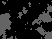

In [357]:
import random
H = 39
W = 52
size = np.random.randint(39*52//8, 39*52//3)
diversity_prob = 0.05
    
def random_region(H, W, size, diversity_prob):
    image = np.zeros((H, W), dtype=np.bool)
    openlist = []

    def check_neighbours(image, point):
        x, y = point
        res = []

        for direction in ((-1, 0), (1, 0), (0, 1), (0, -1)):
            newx = x + direction[0]
            newy = y + direction[1]
            if newx >= 0 and newx<image.shape[0] and newy>=0 and newy<image.shape[1]:
                if image[newx, newy] == 0:
                    res.append((newx, newy))
        return res

    i=0
    while i < size:
        if openlist == []:
            x = np.random.randint(0, H)
            y = np.random.randint(0, W)
            openlist.append((x, y))
            image[x, y] = 1
            i+=1
        else:
            if np.random.rand() < diversity_prob:
                x = np.random.randint(0, H)
                y = np.random.randint(0, W)
                if image[x, y] == 0:
                    openlist.append((x, y))
                    image[x, y] = 1
                    i += 1
                    continue

            # random a point from the open list
            j = np.random.randint(0, len(openlist))
            point = openlist[j]
            res = check_neighbours(image, point)
            if len(res) == 0:
                openlist = openlist[0:j] + openlist[j+1:]
            else:
                nex = random.choice(res)
                openlist.append(nex)
                image[nex[0], nex[1]] = 1
                i += 1
    return image

image = random_region(H, W, size, diversity_prob)
Image.fromarray(image.astype(np.uint8)*100)
    

In [362]:
from subprocess import call
temp_image_path = "/scratch/yang/aws_data/CIL_modular_data/_benchmarks_results/mm45_v4_base_newseg_noiser_3cams_1,2,3,4,5,6,7,8,9,10,11,12,13,14_YangExp3cam_Town01/"
cmd = ["find", temp_image_path, "-name", "00*png", "-print | xargs rm"]
print(" ".join(cmd))
call(" ".join(cmd), shell=True)

find /scratch/yang/aws_data/CIL_modular_data/_benchmarks_results/mm45_v4_base_newseg_noiser_3cams_1,2,3,4,5,6,7,8,9,10,11,12,13,14_YangExp3cam_Town01/ -name 00*png -print | xargs rm


123

In [363]:
!cd ..


In [366]:
import sys
sys.path.append("../")
from all_perceptions import Perceptions

In [367]:
perceptions = Perceptions(det_COCO=False,
                          det_TL=False,
                          det_TS=False,
                          seg=True,
                          depth=False,
                          batch_size=1,
                          gpu_assignment=[7],
                          compute_methods={},
                          viz_methods={},
                          path_config="path_jormungandr_newseg")

('Model ', 'seg', ' replicate ', 0, ' is using GPU ', '7')
begin initialization
initialization finished


In [376]:
def tester(perceptions):
    img = np.zeros((1, 256,256, 3), dtype=np.uint8)
    return perceptions.compute(img)

In [377]:
from multiprocessing import Process
p = Process(target=tester, args=(perceptions,))

In [380]:
#p.start()
p.join()

In [395]:
!cat ../perceptions_multiprocess.py

from all_perceptions import Perceptions
from multiprocessing import Lock

class PerceptionsMultiprocess():
    def __init__(self, **kwargs):
        #self.perception = Perceptions(**kwargs)
        self.lock = Lock()

    def all_in_one(self, image_input):
        self.lock.acquire()
        compute = image_input
        self.lock.release()
        print(compute)
        return compute

    def destroy(self):
        self.perception.destroy()



In [399]:
import perceptions_multiprocess
reload(perceptions_multiprocess)

p = perceptions_multiprocess.PerceptionsMultiprocess()

In [402]:
def tester(p, l):
    for i in l:
        print(i)
        out = p.all_in_one(i)
        print(out)

        
process = Process(target=tester, args=(p, range(10)))


In [401]:
p.all_in_one(888)

888


888

In [3]:
path = "/scratch/yang/aws_data/carla_collect/steer103_v2_dir"

path = "/scratch/yang/aws_data/carla_collect/steer103_v2_dir/default_RotationPitch=5_WeatherId=12/data_00000.h5"
import h5py
a=h5py.File(path, "r")

In [5]:
a.keys()

[u'CameraLeft',
 u'CameraMiddle',
 u'CameraRight',
 u'SegLeft',
 u'SegMiddle',
 u'SegRight',
 u'targets']

In [18]:
import os, glob
from subprocess import call
images = []
sample = 0
out_base = "/scratch/yang/aws_data/carla_collect/steer103_v2_dir/investigate/"
for path in glob.glob("/scratch/yang/aws_data/carla_collect/steer103_v2_dir/default_RotationPitch=5_WeatherId=*/data_000*.h5"):
    a=h5py.File(path, "r")
    for i, value in enumerate(a['targets'][:, 24]):
        if value == 5.0:
            images.append(a['CameraMiddle'][i])
        elif len(images) > 0:
            this = 0
            for image in images:
                this_name = os.path.join(out_base, "%04d.jpg" % this)
                with open(this_name, "w") as f:
                    f.write(image)
                this += 1

            cmd = ["ffmpeg", "-y", "-i",  out_base+"/%04d.jpg", "-c:v", "libx264", out_base+str(sample).zfill(4)+".mp4"]
            call(" ".join(cmd), shell=True)
            cmd = ["find", out_base, "-name", "*jpg", "-print | xargs rm"]
            call(" ".join(cmd), shell=True)

            sample += 1
            images = []

In [1]:
import h5py
path = "/scratch/yang/aws_data/carla_collect/steer103_v2_dir/default_PositionZ=1.4_WeatherId=01/data_00000.h5"
f = h5py.File(path, 'r')

/home/yang/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f.keys()

[u'CameraLeft',
 u'CameraMiddle',
 u'CameraRight',
 u'SegLeft',
 u'SegMiddle',
 u'SegRight',
 u'targets']

In [6]:
x = f['targets'][:, 8]
y = f['targets'][:, 9]
time = f['targets'][:, 20]
is_noisy = (f['targets'][:, 0] == f['targets'][:, 5])

In [ ]:
import numpy as np
import math

sldist = lambda c1, c2: math.sqrt((c2[0] - c1[0]) ** 2 + (c2[1] - c1[1]) ** 2)
def compute_waypoints(x, y, time, is_noisy, future_time):
    # return a list of true or false indicating whether this appears in the end or not
    # for each true point, returns the expected waypoints
    # 
    data = np.stack([x, y, time, is_noisy], axis=0)
    # 4 * N matrix
    is_seperate = lambda pos1, pos2: sldist(pos1, pos2) > 0.2 * 9.7 * 1.5
    
    # seperate the parts in to multiple subsequences
    seqs = []
    last_i = 0
    for i in range(data.shape[1]-1):
        if is_seperate(data[:2, i], data[:2, i+1]):
            seqs.append(data[:, last_i:i+1])
            last_i = i+1
    
    flattened_indicator = []
    out_waypoints = []
    for seq in seqs:
        # seq is 4*N
        N = seq.shape[1]
        if N < 3: 
            flattened_indicator += [False] * N
            continue
        
        # this is asserting we have a constant step size
        step_time = seq[2, 1] - seq[2, 0]
        step_time /= 1000.0 # convert it to second
        future_steps = int(math.ceil(future_time / step_time))

        for i in range(N-future_steps):
            if any(seq[3, i:(i+future_steps)]):
                # if any of the future data point is noisy, then we ignore this
                flattened_indicator.append(False)
                continue
            else:
                # None of the future is noisy
                flattened_indicator.append(True)
                # begin computation of the waypoints
                this_waypoint = []
                for j in range(1, future_steps):
                    delta = seq[:2, i+j] - seq[:2, i]
                    this_waypoint.append(delta)
                out_waypoints.append(this_waypoint)

In [ ]:
# we also need the traffic light, all of sudden pedestrain not considered

In [12]:
all([True, True, False])

False

In [9]:
time

array([ 4200.,  4400.,  4600.,  4800.,  5000.,  5200.,  5400.,  5600.,
        5800.,  6000.,  6200.,  6400.,  6600.,  6800.,  7000.,  7200.,
        7400.,  7600.,  7800.,  8000.,  8200.,  8400.,  8600.,  8800.,
        9000.,  9200.,  9400.,  9600.,  9800., 10000., 10200., 10400.,
       10600., 10800., 11000., 11200., 11400., 11600., 11800., 12000.,
       12200., 12400., 12600., 12800., 13000., 13200., 13400., 13600.,
       13800., 14000., 14200., 14400., 14600., 14800., 15000., 15200.,
       15400., 15600., 15800., 16000., 16200., 16400., 16600., 16800.,
       17000., 17200., 17400., 17600., 17800., 18000., 18200., 18400.,
       18600., 18800., 19000., 19200., 19400., 19600., 19800., 20000.,
       20200., 20400., 20600., 20800., 21000., 21200., 21400., 21600.,
       21800., 22000., 22200., 22400., 22600., 22800., 23000., 23200.,
       23400., 23600., 23800., 24000., 24200., 24400., 24600., 24800.,
       25000., 25200., 25400., 25600., 25800., 26000., 26200., 26400.,
      

In [7]:
is_noisy

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,

# Try to cluster the trajectories

In [20]:
import h5py, glob
import numpy as np
path = "/scratch/yang/aws_data/carla_collect/steer103_v3_waypoint/*/*h5"

all_wps = []
for f in sorted(glob.glob(path)):
    h5 = h5py.File(f, "r")
    targets = h5["targets"]
    wps = targets[:, 35:(35+int(targets[0, -1]))]
    wps = np.reshape(wps, (200, -1, 2))
    all_wps.append(wps)
    h5.close()

In [22]:
wps = np.concatenate(all_wps, axis=0)

In [58]:
help(random.randint)

Help on method randint in module random:

randint(self, a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [370]:
def plot_wp(wps):
    plt.plot(wps[:, 0], wps[:, 1], 'x')
    plt.xlim(0, 1)
    plt.ylim(-1, 1)
    plt.show()
def plot_wp_noscale(wps):
    plt.plot(wps[:, 0], wps[:, 1], 'x')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import random

id = random.randint(0, wps.shape[0])
print(id)
plt.plot(wps[id,:, 0], wps[id,:, 1], 'x')
plt.xlim(0, 1)
plt.ylim(-1, 1)
plt.show()

In [45]:
from scipy import interpolate
t, c, k = interpolate.splrep(wps[id, :, 0], wps[id, :, 1])
print(t)
print(c)
print(k)

[0.80285919 0.80285919 0.80285919 0.80285919 2.3921442  3.18100452
 3.96726608 4.74253178 5.44017458 6.64911795 6.64911795 6.64911795
 6.64911795]
[-0.06148737 -0.11312756 -0.22080644 -0.39444396 -0.53238691 -0.66909116
 -0.83311351 -0.95072274 -1.02468991  0.          0.          0.
  0.        ]
3


In [49]:
print(wps[id, :, 0])
print(wps[id, :, 1])

[0.8028592 1.5998268 2.3921442 3.1810045 3.967266  4.742532  5.4401746
 6.069377  6.649118 ]
[-0.06148737 -0.1532263  -0.26723778 -0.39609474 -0.53375334 -0.67405313
 -0.8019765  -0.91797084 -1.0246899 ]


In [ ]:
xnew = np.arange(0, 10, np.pi/50)
ynew = interpolate.splev(xnew, (t,c,k), der=0)
plt.plot(xnew, ynew)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.show()

In [233]:
# delete the totally stopping
import copy
wps_bak = copy.deepcopy(wps)

In [758]:
# restore the original wps
wps = wps_bak

In [759]:
wps = wps[wps[:,8,0]>0.5, :, :]

In [760]:
# scale down by the farthest point
scale0 = np.abs(wps[:, 8:9, 0:1])
#scale1 = np.abs(wps[:, 8:9, 1:2])

In [761]:
wps[:, :, 0:1] /= scale0
wps[:, :, 1:2] /= (scale0)


In [762]:
print(np.max(wps[:,:,0]))
print(np.min(wps[:,:,0]))
print(np.max(wps[:,:,1]))
print(np.min(wps[:,:,1]))

1.335113
-0.0018449313
3.268797
-4.111483


In [365]:
wps.shape

(121526, 9, 2)

In [ ]:
from sklearn.cluster import KMeans

data = np.reshape(wps, (wps.shape[0], 18))

kmeans = KMeans(n_clusters=30, n_jobs=-1, verbose=2)
kmeans.fit(data)
print(kmeans.cluster_centers_)


In [913]:
i=-1

In [ ]:
i+= 1
print(i)
plot_wp(np.reshape(kmeans.cluster_centers_[i], (9,2)))

In [ ]:
ind = (kmeans.labels_==i)
this = wps[ind, :, :]
id = random.randint(0, this.shape[0])
print(id)
plot_wp(this[id, :, :])

In [408]:
from sklearn import datasets
iris=datasets.load_iris()

In [410]:
iris.data.shape

(150, 4)

In [984]:
import pickle
out =pickle.load(open("./utils/cluster_centers.npy", "rb"))

In [986]:
np.max(out
      )

2.3953931